Elizabeth produced some predictions for expected correlation functions from her HOD. I'm going to plot those against the results I've calculated via halotools.

In [1]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from itertools import cycle
from collections import defaultdict
colors = cycle(sns.color_palette())

In [2]:
datafile = '/u/ki/swmclau2/Git/HODEmulator/data/xi_gg_z0.0'
prediction = np.loadtxt(datafile) #r, xi_gg, xi_gg_1h
outputdir = '/u/ki/swmclau2/des/HODOutput/'
datadir = outputdir+'chinchilla_tests_300p/'
predictions = {}
predictions['default'] = np.loadtxt(datadir+'halo_model_default.txt')

In [3]:
a = 1.0

rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2

In [4]:
#Chinchilla
outputdir = '/u/ki/swmclau2/des/HODOutput/'
sim = 'chinchilla'
#boxsize_npart = [(125.0, 1024),(125.0, 2048), (250.0, 1024), (250.0, 128), (250.0, 196), (250.0, 2048),
#                (250.0, 2560), (250.0, 320), (250.0, 512), (250.0, 768), (250.0, 85), (400.0, 1024),
#                (400.0, 136), (400.0, 2048), (400.0, 210), (400.0, 315), (400.0, 512), (400.0, 768)]
boxsize_npart = [(125.0, 1024),(125.0, 2048),(250.0, 2048),
                (250.0, 2560), (250.0, 512), (250.0, 768), (400.0, 1024),
                (400.0, 2048), (400.0, 768)]

ch_data = defaultdict(list)
version_names = []

for boxsize, npart in boxsize_npart:
#for sim in simnames:
    vn = 'Lb%d-%d'%(int(boxsize),npart )
    version_names.append(vn)
    ch_data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_all_%.3f_default.npy'%(sim,vn,a)) )
    ch_data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_1h_%.3f_default.npy'%(sim,vn,a))  )
    #data[vn].append( np.loadtxt(outputdir+'%s/%s/xi_2h_%.3f.npy'%(sim,vn,a))  )
    #data[vn].append( np.loadtxt(outputdir+'%s/%s/wp_all_%.3f.npy'%(sim,vn,a)) )

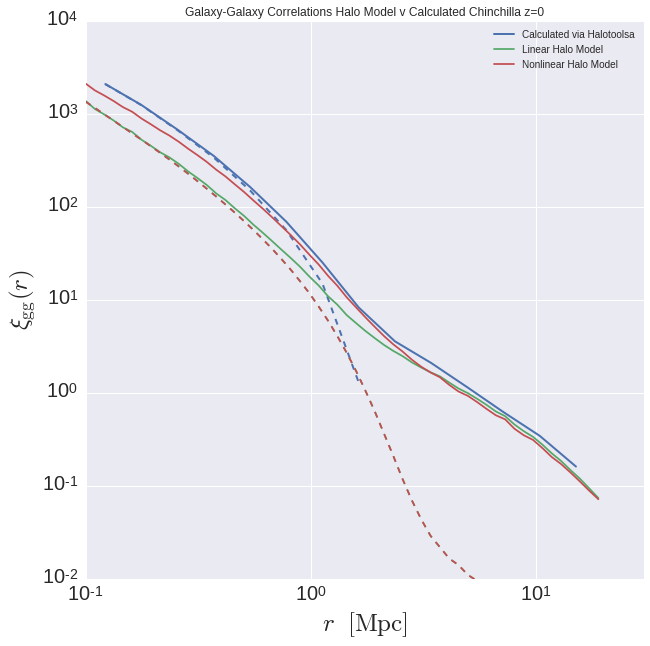

In [5]:
fig = plt.figure(figsize = (10,10))
version_names = ['Lb250-2560']
for vn, color in zip(version_names, colors):
#for sim, color in zip(simnames, colors):
    rz = 1.0/a -1 
    #MPC/h v MPC issue?
    plt.plot(rbin_centers, ch_data[vn][0], lw = 2,
             label='Calculated via Halotoolsa', color=color)
             #label = sim, color = color)
    plt.plot(rbin_centers, ch_data[vn][1], ls = '--', lw = 2, color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)
    
c = next(colors)
plt.plot(prediction[:, 0], prediction[:, 1],  label = 'Linear Halo Model', color = c)
plt.plot(prediction[:, 0], prediction[:, 2], ls = '--', color = c)
c = next(colors)
plt.plot(predictions['default'][:, 0], predictions['default'][:, 1],  label = 'Nonlinear Halo Model', color = c)
plt.plot(predictions['default'][:, 0], predictions['default'][:, 2], ls = '--', color = c)
    
plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated Chinchilla z=0')
plt.xlim(xmin = 0.1, xmax = 30)
plt.ylim(ymin = 1e-2, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=10)

plt.show()

In [6]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
#simnames = ['fox']
simnames = ['multidark_highres', 'multidark', 'bolshoi', 'fox', 'emu']
#scale_factors = [0.25,0.333,0.5,  0.540541, 0.588235, 0.645161, 0.714286, 0.8, 0.909091, 1.0 ] #sf of emu and fox
sf = {sim: a for sim in simnames}
sf['multidark_highres'] = 1.001
data = defaultdict(list)

#for sf in scale_factors:
for sim in simnames:
    data[sim].append( np.loadtxt(outputdir+'%s/xi_all_%.3f.npy'%(sim,sf[sim])) )
    data[sim].append( np.loadtxt(outputdir+'%s/xi_1h_%.3f.npy'%(sim,sf[sim]))  )
    data[sim].append( np.loadtxt(outputdir+'%s/xi_2h_%.3f.npy'%(sim,sf[sim]))  )
    data[sim].append( np.loadtxt(outputdir+'%s/wp_all_%.3f.npy'%(sim,sf[sim])) )

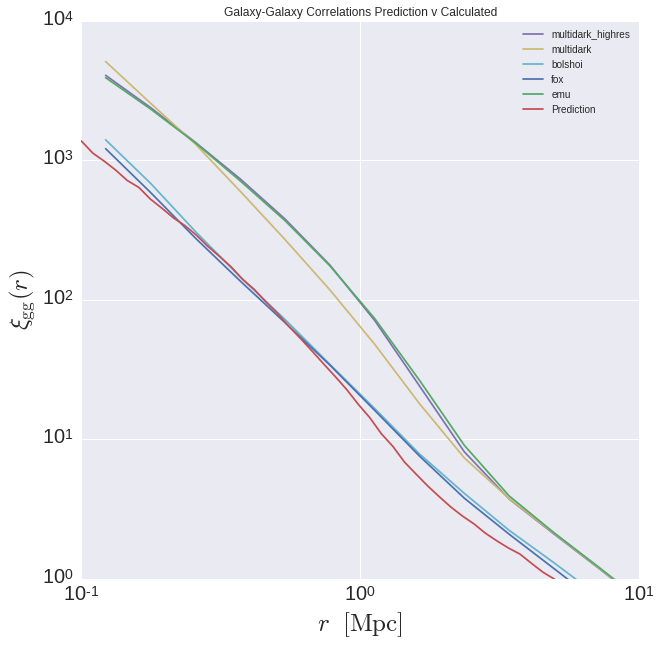

In [7]:
fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
for sim, color in zip(simnames, colors):
    rz = 1.0/a -1 
    #MPC/h v MPC issue?
    plt.plot(rbin_centers, data[sim][0], alpha = 1,
             label = sim, color = color)
    #plt.plot(rbin_centers, data[sim][1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)
    
c = next(colors)
plt.plot(prediction[:, 0], prediction[:, 1],  label = 'Prediction', color = c)
#plt.plot(prediction[:, 0], prediction[:, 2], ls = '--', color = c)

    
plt.title('Galaxy-Galaxy Correlations Prediction v Calculated')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=10)

plt.show()

In [8]:
%%bash
ls ~/des/HODOutput/chinchilla_tests/*

/u/ki/swmclau2/des/HODOutput/chinchilla_tests/halo_model_default.txt
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/halo_model_highMinMass.txt
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/halo_model_highMinMassMMax.txt
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/halo_model_step_1.txt
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/halo_model_step_2.txt
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_1h_1.000_default.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_1h_1.000_highMinMass.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_1h_1.000_stepFunc.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_2h_1.000_default.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_2h_1.000_highMinMass.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_2h_1.000_stepFunc.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_all_1.000_default.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_all_1.000_default_250_2048.npy
/u/ki/swmclau2/des/HODOutput/chinchilla_tests/xi_all_1.000_defau

In [9]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
datadir = outputdir+'emu_tests/'
sim = 'emu'
a = 1.0
data = {}

data['highMinMass'] = np.loadtxt(datadir+'xi_all_%.3f_highMinMass.npy'%a)
#data['stepFunc'] = np.loadtxt(datadir+'xi_all_%.3f_stepFunc_400_2048.npy'%a)
data['default'] = np.loadtxt(datadir+'xi_all_%.3f_default.npy'%a)
data['medMinMass'] = np.loadtxt(datadir+'xi_all_%.3f_medMinMass.npy'%a)

In [10]:
if data['default'].shape[0] == 19:
    rbins = np.logspace(-1, 1.7, 20)
else:
    rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2

In [11]:
for r, xi in zip(rbin_centers, data['default']):
    print r, xi

0.119354599393 1967.17643424
0.165555808531 1204.37085777
0.229641135555 705.686123562
0.318533379209 403.56558677
0.441835098164 218.658305845
0.612865924615 110.627881357
0.85010141366 50.5574899156
1.17916885975 20.5144922091
1.63561567768 8.0472426202
2.26874940171 3.86940579584
3.14696411756 2.26434223903
4.36512871352 1.37540182669
6.05483506446 0.82245349422
8.39861320568 0.486845490634
11.6496490867 0.278449187838
16.1591349094 0.159233495608
22.4142065634 0.0932824416351
31.0905663381 0.0591987402448
43.1254754653 0.0398254003909


In [12]:
predictions = {}
predictions['highMinMass'] = np.loadtxt(datadir+'box000_Min13.1_z0.0')
#predictions['stepFunc'] = np.loadtxt(datadir+'halo_model_step_2.txt')
predictions['default'] = np.loadtxt(datadir+'box000_Min12.1_z0.0')
predictions['medMinMass'] = np.loadtxt(datadir+'box000_Min12.5_z0.0')

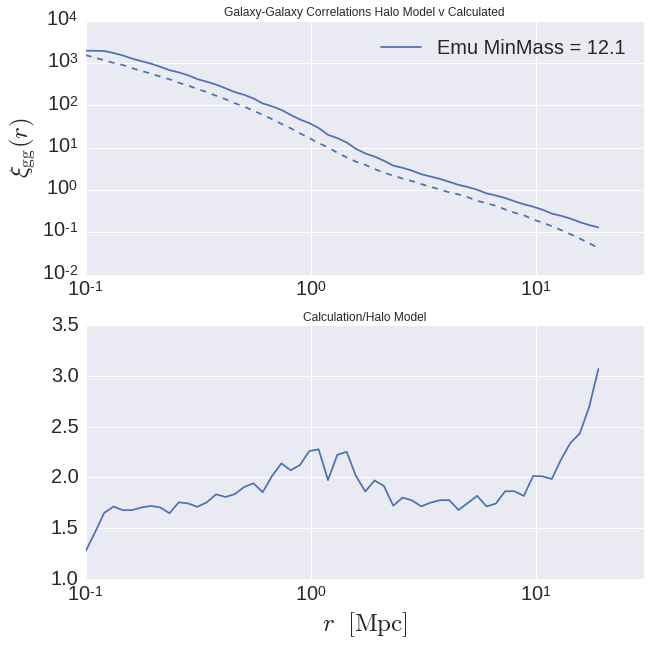

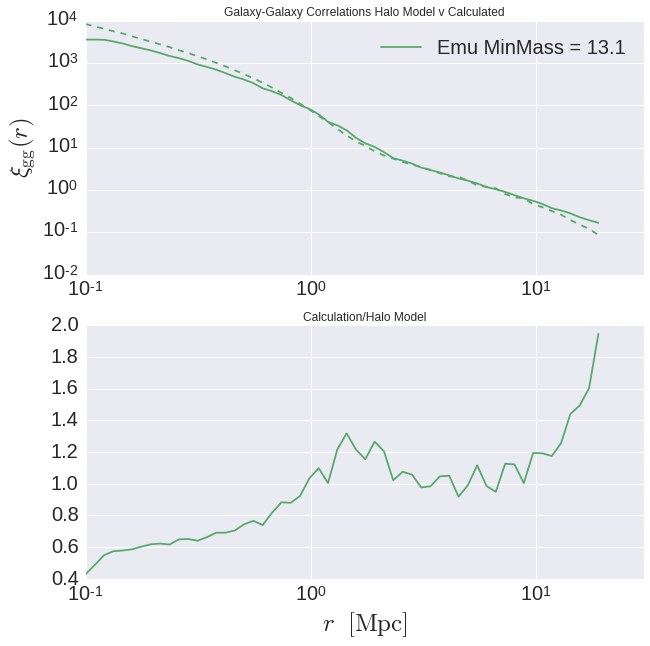

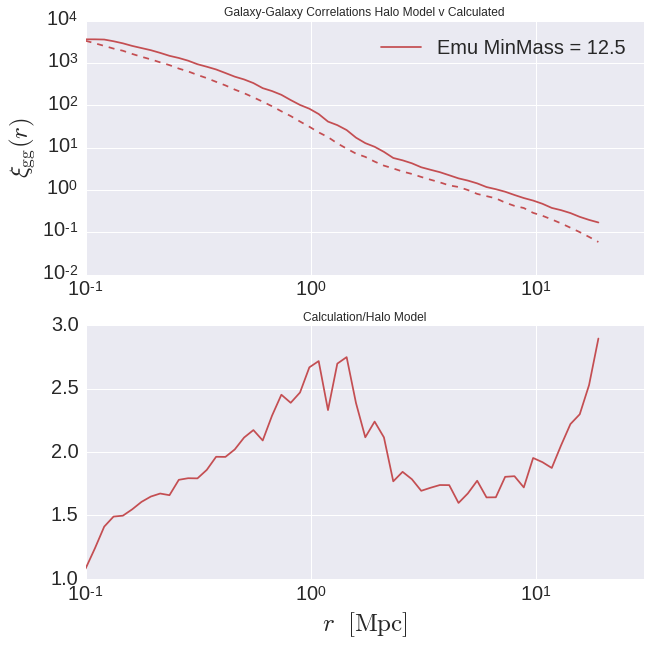

In [13]:
colors = sns.color_palette()

labels = {'default': 12.1, 'medMinMass':12.5, 'highMinMass':13.1}
#fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
for (label, xi_all), color in zip(data.iteritems(), colors):
    fig = plt.figure(figsize = (10,10))
    if data[label].shape[0] == 19:
        rbins = np.logspace(-1, 1.7, 20)
    else:
        rbins = np.logspace(-1, 1.25, 15)
    rbin_centers = (rbins[1:]+rbins[:-1])/2

    interp = np.interp(predictions[label][:,0], rbin_centers, data[label])

    plt.subplot(211)
    rz = 1.0/a -1 
    #MPC/h v MPC issue?
    #plt.plot(rbin_centers, xi_all, alpha = 1,
    #         label = label, color = color)
    plt.plot(predictions[label][:, 0], interp, label = 'Emu MinMass = %.1f'%labels[label], color = color)
    plt.plot(predictions[label][:, 0], predictions[label][:, 1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[][1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)
    
#c = colors[len(data)]
#plt.plot(prediction[:, 0], prediction[:, 1],  label = 'Halo Model', color = c)
#plt.plot(prediction[:, 0], prediction[:, 2], ls = '--', color = c)

    
    plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
    plt.xlim(xmin = 0.1, xmax = 30)
    plt.ylim(ymin = 1e-2, ymax = 1e4)
    plt.loglog()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
    plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
    plt.legend(loc='best', fontsize=20)
    
    plt.subplot(212)
    plt.title('Calculation/Halo Model')
    interp = np.interp(predictions[label][:,0], rbin_centers, data[label])
    plt.plot(predictions[label][:,0], interp/predictions[label][:,1], color = color)
    
    plt.xlim(xmin = 0.1, xmax = 30)
    #plt.loglog()
    plt.xscale('log')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
    #plt.legend(loc='best', fontsize=20)
    

    plt.show()

In [33]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
datadir = outputdir+'chinchilla_step_tests/'
sim = 'chinchilla'
a = 1.0
data = {}
for mMin in [12.25+i*0.25 for i in xrange(7)]:
    data[mMin] = np.loadtxt(datadir+'xi_all_%.3f_stepFunc_mm_%.2f.npy'%(a,mMin) )

In [34]:
for mMin in [12.25+i*0.25 for i in xrange(1,7)]:
    print (data[mMin][7:]/data[12.25][7:]).mean()

1.21349371914
1.53226752662
1.89168223577
2.50376398118
3.23291057414
4.7369235939


In [35]:
ratio_prediction = {12.50:  1.21,
12.75:  1.49,
13.00:  1.88,
13.25:  2.45,
13.50:  3.27,
13.75:  4.50,}

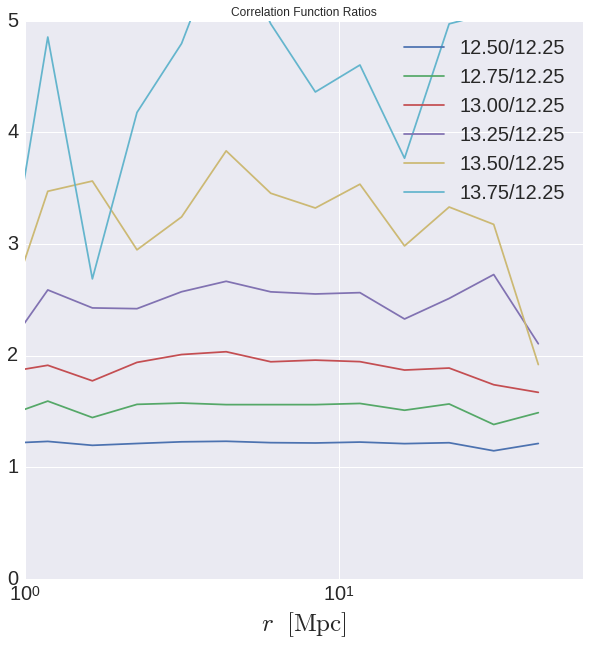

In [39]:
colors = sns.color_palette()

rbins = np.logspace(-1, 1.7, 20)
rbin_centers = (rbins[1:]+rbins[:-1])/2

fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
mMins = [12.25+i*0.25 for i in xrange(1,7)]
for mm, color in zip(mMins, colors):
    #print '%.2f/12.25:\t'%(mm), '%.2f'%np.mean(data[mm][6:]/data[12.25][6:])
    plt.plot(rbin_centers, data[mm]/data[12.25], label = '%.2f/12.25'%(mm), color = color)
    #plt.plot(rbin_centers, np.ones(rbin_centers.shape)*ratio_prediction[mm], ls = '--',lw = 3,color = color)
        
plt.title('Correlation Function Ratios')
plt.xlim(xmin = 1, xmax = 60)

plt.ylim(ymin = 0, ymax = 5)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.show()

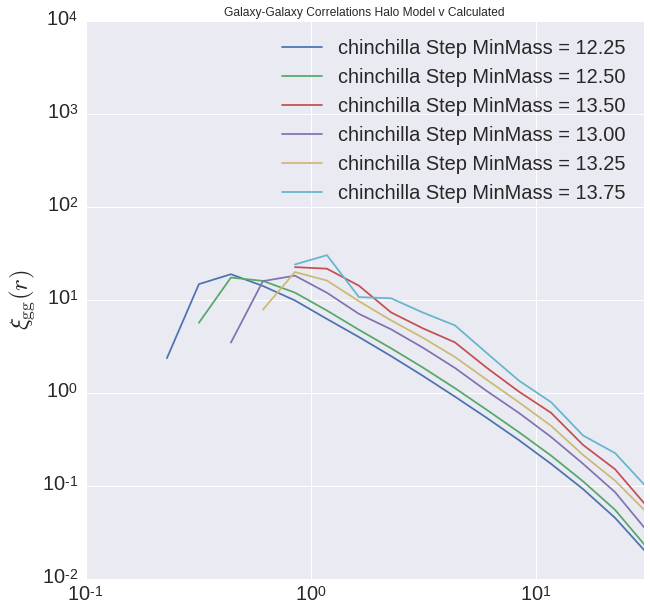

In [38]:
colors = sns.color_palette()

#labels = {'default': 12.1, 'medMinMass':12.5, 'highMinMass':13.1}
fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
for (label, xi_all), color in zip(data.iteritems(), colors):
    #fig = plt.figure(figsize = (10,10))
    rbins = np.logspace(-1, 1.7, 20)
    rbin_centers = (rbins[1:]+rbins[:-1])/2

    #MPC/h v MPC issue?
    #plt.plot(rbin_centers, xi_all, alpha = 1,
    #         label = label, color = color)
    plt.plot(rbin_centers, xi_all, label = '%s Step MinMass = %.2f'%(sim, label), color = color)
    
    plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
    plt.xlim(xmin = 0.1, xmax = 30)
    plt.ylim(ymin = 1e-2, ymax = 1e4)
    plt.loglog()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
    plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
    plt.legend(loc='best', fontsize=20)  

plt.show()

In [19]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
datadir = outputdir+'emu_step_tests/'
sim = 'emu'
a = 1.0
data = {}
for mMin in [12.1+i*0.2 for i in xrange(6)]:
    data[mMin] = np.loadtxt(datadir+'xi_all_%.3f_default_mm_%.2f.npy'%(a,mMin) )

In [20]:
print r, xi in zip(rbin_centers, )

43.1254754653 False


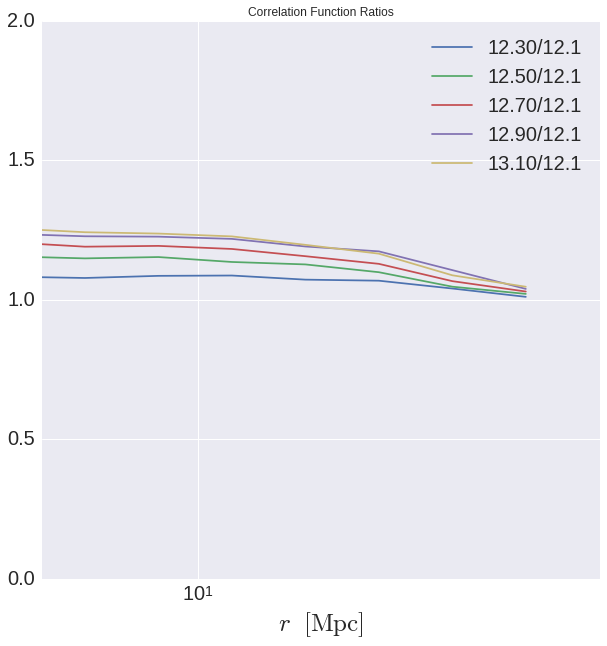

In [21]:
colors = sns.color_palette()

rbins = np.logspace(-1, 1.7, 20)
rbin_centers = (rbins[1:]+rbins[:-1])/2

fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
mMins = [12.1+i*0.2 for i in xrange(1,6)]
for mm, color in zip(mMins, colors):
    #print '%.2f/12.25:\t'%(mm), '%.2f'%np.mean(data[mm][6:]/data[12.25][6:])
    plt.plot(rbin_centers, data[mm]/data[12.1], label = '%.2f/12.1'%(mm), color = color)
    #plt.plot(rbin_centers, np.ones(rbin_centers.shape)*ratio_prediction[mm], ls = '--',lw = 3,color = color)
        
plt.title('Correlation Function Ratios')
plt.xlim(xmin = 5, xmax = 60)

plt.ylim(ymin = 0, ymax = 2)
#plt.loglog()
plt.xscale('log')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.show()

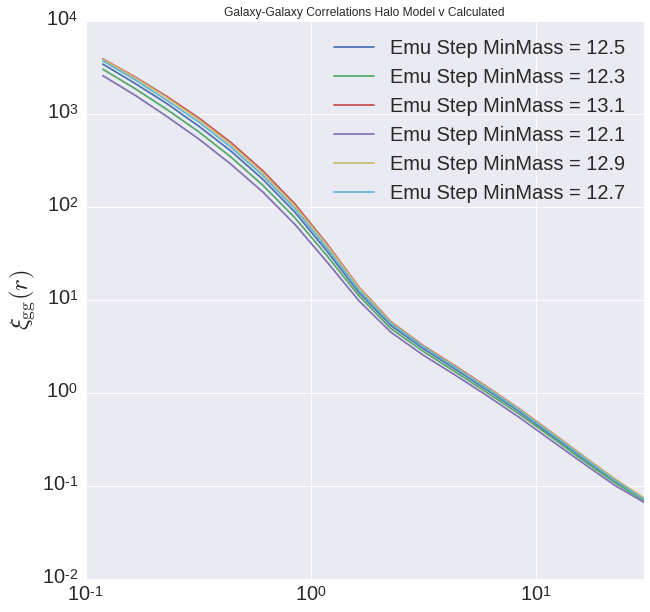

In [22]:
colors = sns.color_palette()

#labels = {'default': 12.1, 'medMinMass':12.5, 'highMinMass':13.1}
fig = plt.figure(figsize = (10,10))
#for vn, color in zip(version_names, colors):
for (label, xi_all), color in zip(data.iteritems(), colors):
    #fig = plt.figure(figsize = (10,10))
    rbins = np.logspace(-1, 1.7, 20)
    rbin_centers = (rbins[1:]+rbins[:-1])/2

    #MPC/h v MPC issue?
    #plt.plot(rbin_centers, xi_all, alpha = 1,
    #         label = label, color = color)
    plt.plot(rbin_centers, xi_all, label = 'Emu Step MinMass = %.1f'%label, color = color)
    
    plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
    plt.xlim(xmin = 0.1, xmax = 30)
    plt.ylim(ymin = 1e-2, ymax = 1e4)
    plt.loglog()
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    #plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
    plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
    plt.legend(loc='best', fontsize=20)  

plt.show()

In [23]:
outputdir = '/u/ki/swmclau2/des/HODOutput/'
#datadir = outputdir+'chinchilla_tests/'
sim = 'chinchilla'
a = 1.0
data = {}

data['gal_h'] = np.loadtxt(outputdir+'chinchilla_tests/xi_all_gal_%.3f_h.npy'%a)

data['subHalo_h'] = np.loadtxt(outputdir+'chinchilla_tests/xi_all_halo_%.3f_h_sh.npy'%a)
data['noSubHalo_h'] = np.loadtxt(outputdir+'chinchilla_tests/xi_all_halo_%.3f_h_nosh.npy'%a)

In [24]:
predictions = {}
predictions['linear'] = np.loadtxt(outputdir+'chinchilla_tests_300p/halo_model_step_1.txt')
predictions['nonlinear'] = np.loadtxt(outputdir+'chinchilla_tests_300p/halo_model_step_2.txt')

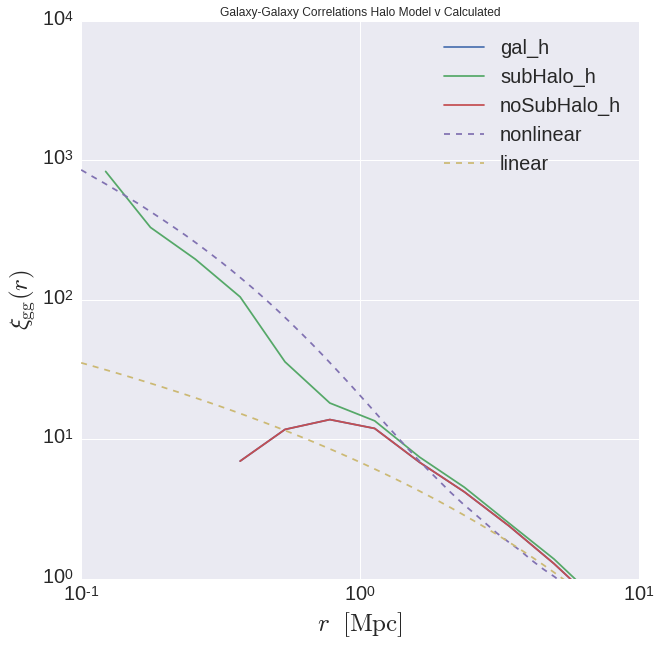

In [25]:
colors = sns.color_palette()
rbins = np.logspace(-1, 1.25, 15)
rbin_centers = (rbins[1:]+rbins[:-1])/2
fig = plt.figure(figsize = (10,10))
for (label, xi_all), color in zip(data.iteritems(), colors):
    rz = 1.0/a -1 
    plt.plot(rbin_centers, xi_all, 
             label = label, color = color)
    #plt.plot(rbin_centers, data[sim][1], ls = '--', color = color)
    #plt.plot(rbin_centers, data[vn][2], ls = '-.', color = color)

for (label, xi_all), color in zip(predictions.iteritems(), colors[len(data):]):
    plt.plot(predictions[label][:, 0], predictions[label][:, 1], ls = '--', color = color, label = label)
    
plt.title('Galaxy-Galaxy Correlations Halo Model v Calculated')
plt.xlim(xmin = 0.1, xmax = 10)
plt.ylim(ymin = 1, ymax = 1e4)
plt.loglog()
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(r'$r $  $\rm{[Mpc]}$', fontsize=25)
plt.ylabel(r'$\xi_{\rm gg}(r)$', fontsize=25)
plt.legend(loc='best', fontsize=20)

plt.show()